<a href="https://colab.research.google.com/github/syrine55/dsIBM/blob/main/TD_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Les données ont été extraites d'images qui ont été prises à partir d'échantillons de billets de banque "authentiques" et "falsifiés" de billets de banque. Pour la numérisation, une caméra industrielle habituellement utilisée pour l'inspection d'impression a été utilisée. Les images finales ont 400x 400 pixels. En raison de la lentille de l'objet et de la distance par rapport à l'objet étudié, des images en niveaux de gris avec une résolution d'environ 660 dpi ont été obtenues. L'outil de transformation en ondelettes a été utilisé pour extraire des caractéristiques des images.
###### Les caractéristiques obtenus sont: 
###### 1. La variance de la transformation en ondelettes (continuous)
###### 2. skewness de la transformation en ondelettes (continuous)
###### 3. curtosis de la transformation en ondelettes (continuous)
###### 4. entropy de l'image (continuous)
###### 5. class (integer)

In [59]:
#Importer les librairies necessaires:
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sb
import matplotlib.pyplot as plt


In [7]:
#Importer le dataset "BilletsBanque"
data=pd.read_csv('BilletsBanque.xls')
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [38]:
#dimensions : nombre de lignes, nombre de colonnes
data.shape

(1372, 5)

In [39]:
# Pas de valeurs manquantes
data.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [53]:
##### Afficher le nombre des observations pour chaque valeur unique dans la colonne "Class"
pd.value_counts(data.Class)
#data.groupby("Class").nunique()

0    762
1    610
Name: Class, dtype: int64

In [55]:
# diviser les données en attributs et étiquettes (labes)
donnees=data.iloc[: , :-1]
attr=data.iloc[:,-1]

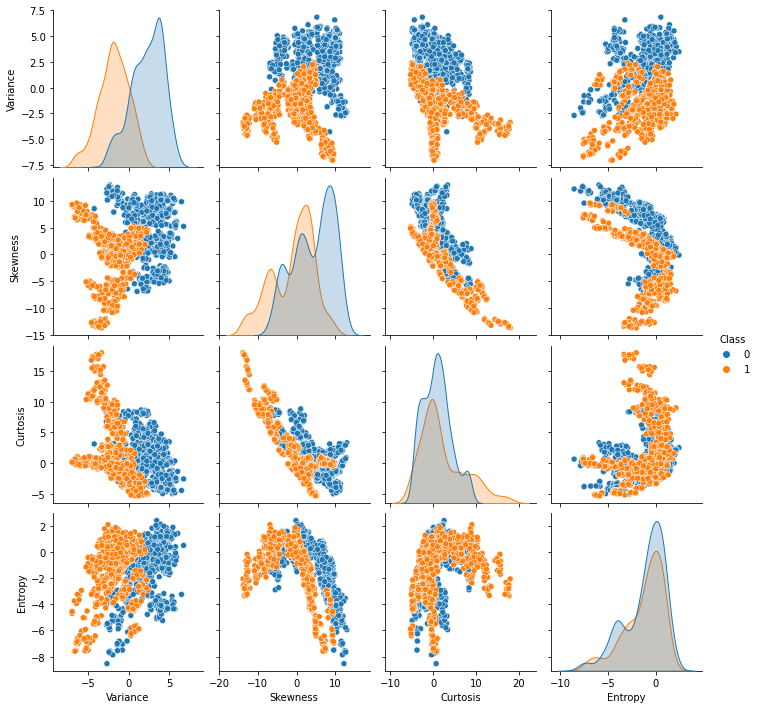

In [57]:
#graphique - croisement deux à deux des variables
sb.pairplot(data, hue="Class")

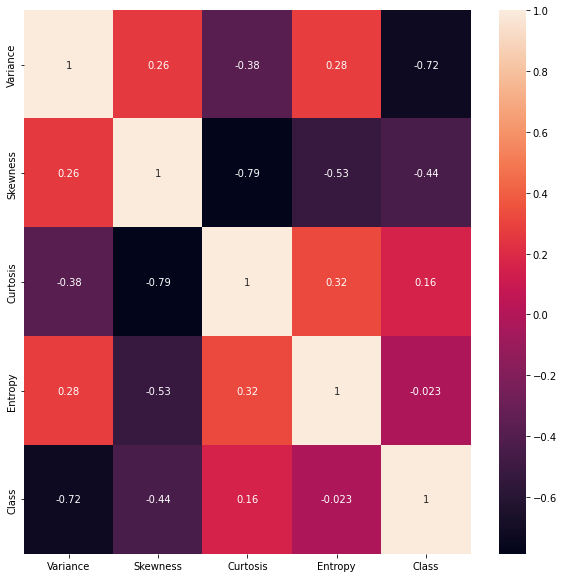

In [69]:
#graphique - croisement deux à deux des variables
#Create Correlation matrix
corrMatrix = data.corr() # matrice
plt.figure(figsize=(10,10)) #représentation graphique
sb.heatmap(data.corr(), annot=True)



In [66]:
# diviser les données en 80% training set  et 20% test set
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(donnees, attr, train_size=0.8, random_state=42)

### Params par défaut

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [87]:
#Entrainer le modèle svm
model=svm.SVC()
model.fit(xTrain, yTrain)                        

SVC()

In [ ]:
# Evaluer les performances du modèle

In [88]:
from sklearn.metrics import classification_report
yPredict=model.predict(xTest)
classification_report(yTest, yPredict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       148\n           1       1.00      1.00      1.00       127\n\n    accuracy                           1.00       275\n   macro avg       1.00      1.00      1.00       275\nweighted avg       1.00      1.00      1.00       275\n'

### Noyeau linéaire

In [99]:
# Kernel linéaire
model_lin = svm.SVC(kernel="linear")
model_lin.fit(xTrain, yTrain)
yPredict1=model_lin.predict(xTest)
classification_report(yTest, yPredict1)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       148\n           1       0.98      0.98      0.98       127\n\n    accuracy                           0.99       275\n   macro avg       0.99      0.99      0.99       275\nweighted avg       0.99      0.99      0.99       275\n'

### Noyeau polynomial

In [102]:
# Kernel poly
model_pol = svm.SVC(kernel="poly")
model_pol.fit(xTrain, yTrain)
yPredict2=model_pol.predict(xTest)
print(classification_report(yTest, yPredict2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       148
           1       0.95      1.00      0.97       127

    accuracy                           0.97       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.97      0.97       275



### Noyeau Sigmoide

In [103]:
# Kernel sigmoid
model_sig = svm.SVC(kernel="sigmoid")
model_sig.fit(xTrain, yTrain)
yPredict3=model_sig.predict(xTest)
print(classification_report(yTest, yPredict3))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       148
           1       0.64      0.59      0.61       127

    accuracy                           0.65       275
   macro avg       0.65      0.65      0.65       275
weighted avg       0.65      0.65      0.65       275



Les scores des noyeaux pour ce dataset sont :
1. Noyeau Gaussien : 1.00
2. Noyeau Polynomial : 0.99
3. Noyeau Linéaire : 0.99
4. Noyeau Sigmoide : 0.67

Nous pouvons conclure que les données suivent une forme gaussienne plus qu'une forme polynamiale ou bien linéaire.

### Noyeau Gaussien RBF

In [109]:
# Kernel rbf (Par défaut)

model_rbf = svm.SVC(kernel='rbf')
model_rbf.fit(xTrain, yTrain)
yPredict4=model_rbf.predict(xTest)
print(classification_report(yTest, yPredict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



# Comparaison des résultats

## Tableau comparatif

Nous allons maintenant comparer dans un tableau l'accuracy de différents modèles

In [110]:
print(classification_report(yTest, yPredict))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       148
           1       0.64      0.59      0.61       127

    accuracy                           0.65       275
   macro avg       0.65      0.65      0.65       275
weighted avg       0.65      0.65      0.65       275



### Courbe ROC

Nous allons maintenant comparer les différents modèles en utilisant la courbe ROC

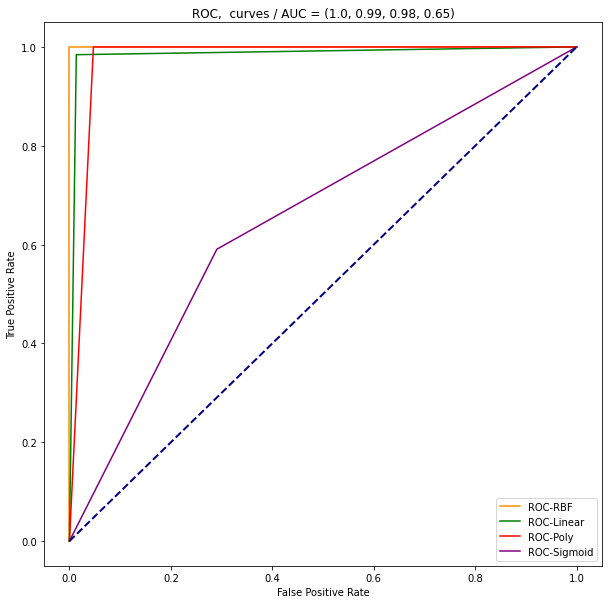

In [127]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10,10))
fpr_1, tpr_1, thresholds = roc_curve(yTest, yPredict4)
plt.plot(fpr_1,tpr_1,color="darkorange", label="ROC-RBF")

fpr_2, tpr_2, thresholds = roc_curve(yTest, yPredict1)
plt.plot(fpr_2,tpr_2,color="green", label="ROC-Linear")

fpr_3, tpr_3, thresholds = roc_curve(yTest, yPredict2)
plt.plot(fpr_3,tpr_3,color="red", label="ROC-Poly")

fpr_4, tpr_4, thresholds = roc_curve(yTest, yPredict3)
plt.plot(fpr_4,tpr_4,color="purple", label="ROC-Sigmoid")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(label=("ROC,  curves / AUC = ("+str(round(auc(fpr_1,tpr_1), 2))+", "+str(round(auc(fpr_2,tpr_2), 2))+", "+str(round(auc(fpr_3,tpr_3), 2))+", "+str(round(auc(fpr_4,tpr_4), 2))+")"))
plt.legend()
plt.show()

### Avec GridSearchCV

Nous allons faire varier les paramétres C et gamma en plus.

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

*   List item
*   List item




In [ ]:
print("Meilleurs paramétres trouvés par GridSeachCV")
print(grid.best_params_)

Meilleurs paramétres trouvés par GridSeachCV
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
# Kernel rbf (Par défaut)
svm = SVC(C=1,kernel="rbf", gamma=0.1)
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       125

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [ ]:
print('Accuracy of svm classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of svm classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of svm classifier on training set: 1.00
Accuracy of svm classifier on test set: 1.00


#### Il s'agit d'un problème de Overfitting

Comment savoir si un modèle fait de <font color='red'>l’overfitting</font> ?

En data science les données parfaites n’existent pas. Vous avez toujours du bruit et des imprécisions. Un modèle fait de l’overfitting 
lorsqu’il commence à  <font color='red'>apprendre ce bruit </font>. Il en résulte un modèle <font color='red'> biaisé</font> qui est impossible à généraliser.

En pratique, un modèle qui overfit est souvent très facile à détecter. L’overfitting intervient lorsque <font color='red'>l’erreur sur  les données de test devient croissante </font>.

Typiquement, si <font color='red'> l’erreur sur les données d’entraînements est beaucoup plus faible que celle sur les données de test </font>, c’est sans doute que votre modèle a trop appris les données.

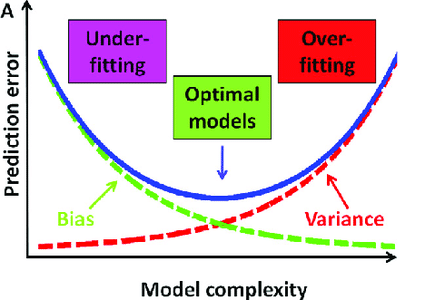

In [ ]:
from IPython.display import Image
Image(filename='overfitting.png')

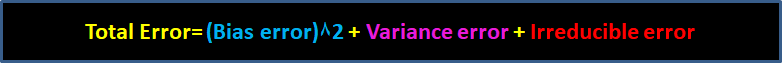

In [ ]:
from IPython.display import Image
Image(filename='erreur.png')

** Bias is<font color='blue'> the difference between the Predicted Value and the Expected Value </font>.

**  Contrary to bias, <font color='#FF0099'> the Variance is when the model takes into account the fluctuations in the data </font> i.e. the noise as well. So, what happens when our model has a high variance?

The model will still consider the variance as something to learn from. That is, the model learns too much from the training data, so much so, that when confronted with new (testing) data, it is unable to predict accurately based on it.

*** <font color='red'> irreducible errors:  EXTERNAL FACTORS </font>


#### Comment éviter l’overfitting ?

*Cross-validation

*Ajouter des données d’entraînements

*Retirer des features

*Méthodes de régularisations: Ridge and Lasso Regression: L1 and L2 Regularization (recommandé pour SVM & random forest)

*Commencer par concevoir des modèles simples

*L’early stopping (recommandé pour les réseaux de neurones)

pour plus de détails (source: https://larevueia.fr/7-methodes-pour-eviter-loverfitting/ )